<a href="https://colab.research.google.com/github/vineelbhatti/NBA_Advanced_Stat_Analysis/blob/main/NBA_Advanced_Stats_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [83]:
year = 2023
url = "https://www.basketball-reference.com/leagues/NBA_2023_totals.html".format(year)
url_per_game = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html".format(year)
url_advanced = "https://www.basketball-reference.com/leagues/NBA_2023_advanced.html".format(year)
html = urlopen(url_advanced)
soup = BeautifulSoup(html)

In [84]:
#Find all column headers
soup.findAll('tr', limit=2)

headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers = headers[1:]

In [85]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

In [86]:
stats = pd.DataFrame(player_stats, columns=headers)
stats = stats[stats['Player'].notna()]
stats.head(40)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,C,23,TOR,55,1140,15.2,.554,.267,.307,...,,0.8,1.4,2.2,.093,,-1.4,-0.8,-2.3,-0.1
1,Steven Adams,C,29,MEM,42,1133,17.5,.564,.004,.490,...,,1.3,2.1,3.4,.144,,-0.3,0.9,0.6,0.7
2,Bam Adebayo,C,25,MIA,75,2598,20.1,.592,.011,.361,...,,3.6,3.8,7.4,.137,,0.8,0.8,1.5,2.3
3,Ochai Agbaji,SG,22,UTA,59,1209,9.5,.561,.591,.179,...,,0.9,0.4,1.3,.053,,-1.7,-1.4,-3.0,-0.3
4,Santi Aldama,PF,22,MEM,77,1682,13.9,.591,.507,.274,...,,2.1,2.4,4.6,.130,,-0.3,0.8,0.5,1.1
5,Nickeil Alexander-Walker,SG,24,TOT,59,884,11.6,.565,.539,.203,...,,0.3,0.8,1.1,.062,,-1.4,0.4,-0.9,0.2
6,Nickeil Alexander-Walker,SG,24,UTA,36,528,13.0,.609,.512,.229,...,,0.3,0.5,0.8,.074,,-0.6,1.1,0.5,0.3
7,Nickeil Alexander-Walker,SG,24,MIN,23,356,9.6,.503,.576,.168,...,,0.0,0.3,0.3,.044,,-2.4,-0.6,-3.0,-0.1
8,Grayson Allen,SG,27,MIL,72,1972,12.3,.612,.657,.226,...,,2.8,2.2,5.1,.123,,-0.6,0.7,0.1,1.0
9,Jarrett Allen,C,24,CLE,68,2220,19.9,.670,.016,.353,...,,5.5,4.0,9.5,.205,,1.3,1.0,2.4,2.4


In [7]:
### Use this url to understand above code: https://medium.com/@osanchez2323/web-scraping-nba-stats-4b4f8c525994 ###

In [87]:
stats['MP'] = stats['MP'].astype(int)
stats['WS'] = stats['WS'].astype(float)
stats['VORP'] = stats['VORP'].astype(float)
filtered_stats = stats[stats['MP'] >= 1500]
filtered_stats.head(5)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
2,Bam Adebayo,C,25,MIA,75,2598,20.1,.592,.011,.361,...,,3.6,3.8,7.4,.137,,0.8,0.8,1.5,2.3
4,Santi Aldama,PF,22,MEM,77,1682,13.9,.591,.507,.274,...,,2.1,2.4,4.6,.130,,-0.3,0.8,0.5,1.1
8,Grayson Allen,SG,27,MIL,72,1972,12.3,.612,.657,.226,...,,2.8,2.2,5.1,.123,,-0.6,0.7,0.1,1.0
9,Jarrett Allen,C,24,CLE,68,2220,19.9,.670,.016,.353,...,,5.5,4.0,9.5,.205,,1.3,1.0,2.4,2.4
11,Kyle Anderson,PF,29,MIN,69,1957,14.8,.583,.212,.275,...,,2.5,2.6,5.1,.125,,0.2,2.3,2.5,2.2


In [88]:
x = filtered_stats['WS']
y = filtered_stats['VORP']
labels = filtered_stats['Player']

In [92]:
filtered_stats = filtered_stats[filtered_stats['Pos'] != 'PF-SF']
filtered_stats = filtered_stats[filtered_stats['Pos'] != 'SF-SG']

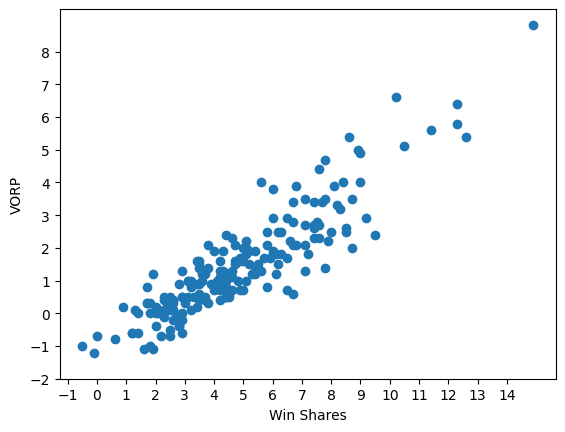

In [70]:
plt.scatter(x, y)
plt.xticks(range(-1, 15, 1))
plt.yticks(range(-2, 9, 1))
plt.xlabel('Win Shares')
plt.ylabel('VORP')
plt.show()

In [93]:
position_colors = {'PG': 'red', 'SG': 'green', 'SF': 'blue', 'PF': 'orange', 'C': 'purple'}

trace = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    text=labels,  # set the labels to show on hover
    hovertemplate='Point %{text}: (%{x:.2f}, %{y:.2f})<extra></extra>',  # customize the hover text
    marker=dict(
        color=[position_colors[p] for p in filtered_stats['Pos']],
        size=10,
        opacity=0.7,
        symbol='circle')
)

In [94]:
# Create the layout for the plot
layout = go.Layout(
    title='VORP vs Win Shares',
    xaxis=dict(title='Win Shares'),
    yaxis=dict(title='VORP'),
)

# Combine the trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()

In [95]:
position_colors = {'PG': 'red', 'SG': 'green', 'SF': 'blue', 'PF': 'orange', 'C': 'purple'}

trace = go.Scatter(
    x=x,
    y=filtered_stats['BPM'],
    mode='markers',
    text=labels,  # set the labels to show on hover
    hovertemplate='Point %{text}: (%{x:.2f}, %{y:.2f})<extra></extra>',  # customize the hover text
    marker=dict(
        color=[position_colors[p] for p in filtered_stats['Pos']],
        size=10,
        opacity=0.7,
        symbol='circle')
)

In [96]:
# Create the layout for the plot
layout = go.Layout(
    title='BPM vs Win Shares',
    xaxis=dict(title='Win Shares'),
    yaxis=dict(title='BPM'),
)

# Combine the trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()